In [1]:
# declare a list tasks whose products you want to use as inputs
upstream = None


In [2]:
# Parameters
product = {"nb": "/Users/migumax/Documents/My_projects/Udemy/duckdb/cases/tmp/sql/mini-projects/movie-rec-system/movie_rec_system/products/eda-pipeline.ipynb"}


# EDA for Content Based Recommendation System

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%reload_ext sql
%sql duckdb:///movies_data.duckdb

There's a new jupysql version available (0.10.7), you're running 0.10.1. To upgrade: pip install jupysql --upgrade


Deploy AI and data apps for free on Ploomber Cloud! Learn more: https://docs.cloud.ploomber.io/en/latest/quickstart/signup.html


Found pyproject.toml from '/Users/migumax/Documents/My_projects/Udemy/duckdb/cases/tmp/sql/mini-projects/movie-rec-system'

In [5]:
%sqlcmd columns -t movies

/Users/migumax/Documents/My_projects/Udemy/duckdb/cases/tmp/sql/mini-projects/movie-rec-system/.poetry-env/lib/python3.11/site-packages/duckdb_engine/__init__.py:359: SAWarning: Did not recognize type 'list' of column 'genre_ids'
  columns = self._get_columns_info(rows, domains, enums, schema)  # type: ignore[attr-defined]


+-------------------+------------------+----------+---------+---------------+---------+
|        name       |       type       | nullable | default | autoincrement | comment |
+-------------------+------------------+----------+---------+---------------+---------+
|     genre_ids     |       NULL       |   True   |   None  |     False     |   None  |
|         id        |     INTEGER      |   True   |   None  |     False     |   None  |
| original_language |     VARCHAR      |   True   |   None  |     False     |   None  |
|      overview     |     VARCHAR      |   True   |   None  |     False     |   None  |
|     popularity    | DOUBLE PRECISION |   True   |   None  |     False     |   None  |
|    release_date   |    TIMESTAMP     |   True   |   None  |     False     |   None  |
|       title       |     VARCHAR      |   True   |   None  |     False     |   None  |
|    vote_average   | DOUBLE PRECISION |   True   |   None  |     False     |   None  |
|     vote_count    |     INTEGER      |   True   |   None  |     False     |   None  |
+-------------------+------------------+----------+---------+---------------+---------+

In [6]:
%sqlcmd columns -t genres

+------+---------+----------+---------+---------------+---------+
| name |   type  | nullable | default | autoincrement | comment |
+------+---------+----------+---------+---------------+---------+
|  id  | INTEGER |   True   |   None  |     False     |   None  |
| name | VARCHAR |   True   |   None  |     False     |   None  |
+------+---------+----------+---------+---------------+---------+

In [7]:
%%sql 
SELECT *
FROM movies

Running query in 'duckdb:///movies_data.duckdb'

+-----------------+---------+-------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+---------------------+----------------------------------------------------+--------------+------------+
|    genre_ids    |    id   | original_language |                                                                                                                                                                                 overview                                                                                                                                                                                | popularity |     release_date    |                       title                        | vote_average | vote_count |
+-----------------+---------+-------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+---------------------+----------------------------------------------------+--------------+------------+
|      [878]      |  848326 |         en        |                                                      When a peaceful colony on the edge of the galaxy finds itself threatened by the armies of the tyrannical Regent Balisarius, they dispatch Kora, a young woman with a mysterious past, to seek out warriors from neighboring planets to help them take a stand.                                                     |  1857.801  | 2023-12-15 00:00:00 |       Rebel Moon - Part One: A Child of Fire       |    6.435     |    812     |
|   [28, 12, 14]  |  572802 |         en        | Black Manta, still driven by the need to avenge his father's death and wielding the power of the mythic Black Trident, will stop at nothing to take Aquaman down once and for all. To defeat him, Aquaman must turn to his imprisoned brother Orm, the former King of Atlantis, to forge an unlikely alliance in order to save the world from irreversible destruction. |  1482.782  | 2023-12-20 00:00:00 |            Aquaman and the Lost Kingdom            |    6.531     |    324     |
|  [18, 878, 28]  |  695721 |         en        |                                                                                        64 years before he becomes the tyrannical president of Panem, Coriolanus Snow sees a chance for a change in fortunes when he mentors Lucy Gray Baird, the female tribute from District 12.                                                                                       |  1329.764  | 2023-11-15 00:00:00 | The Hunger Games: The Ballad of Songbirds & Snakes |    7.247     |    1208    |
|     [28, 80]    |  891699 |         en        |                                             A tormented father witnesses his young son die when caught in a gang's crossfire on Christmas Eve. While recovering from a wound that costs him his voice, he makes vengeance his life's mission and embarks on a punishing training regimen in order to avenge his son's death.                                            |  930.747   | 2023-11-30 00:00:00 |                    Silent Night                    |    5.809     |    194     |
|     [28, 35]    | 1029575 |         en        |                                                             Dan Morgan is many things: a devoted husband, a loving father, a celebrated car salesman. He's also a former assassin. And when his past catches up to his present, he's forced to take his unsusp

In [8]:
%%sql 
SELECT *
FROM genres

Running query in 'duckdb:///movies_data.duckdb'

+-------+-------------+
|   id  |     name    |
+-------+-------------+
|   28  |    Action   |
|   12  |  Adventure  |
|   16  |  Animation  |
|   35  |    Comedy   |
|   80  |    Crime    |
|   99  | Documentary |
|   18  |    Drama    |
| 10751 |    Family   |
|   14  |   Fantasy   |
|   36  |   History   |
+-------+-------------+
Truncated to displaylimit of 10.

In [9]:
%%sql 
WITH ExpandedGenres AS (
    SELECT 
        m.id AS movie_id,
        mg.movie_genre_id,
        g.name AS genre_name
    FROM 
        (SELECT UNNEST(movies.genre_ids) as movie_genre_id, movies.id FROM movies) AS mg
    JOIN 
        movies m ON mg.id = m.id
    JOIN 
        genres g ON mg.movie_genre_id = g.id
)

SELECT
    movie_id,
    STRING_AGG(genre_name, ', ') AS genre_names
FROM 
    ExpandedGenres
GROUP BY 
    movie_id;

Running query in 'duckdb:///movies_data.duckdb'

+----------+-------------------------------------------+
| movie_id |                genre_names                |
+----------+-------------------------------------------+
|  848326  |              Science Fiction              |
|  572802  |         Action, Adventure, Fantasy        |
| 1029575  |               Action, Comedy              |
|  798141  |              Science Fiction              |
|  466420  |           Crime, Drama, History           |
| 1071215  |         Horror, Mystery, Thriller         |
|  504148  |                   Action                  |
|  901362  | Animation, Family, Music, Fantasy, Comedy |
|  930564  |          Drama, Comedy, Thriller          |
|  385687  |          Action, Crime, Thriller          |
+----------+-------------------------------------------+
Truncated to displaylimit of 10.

Movies with 0 vote_counts are usually unreleased. Filtering this out allows for recommendations for only available movies.

In [10]:
%%sql 
CREATE TABLE IF NOT EXISTS movie_genre_data AS
WITH ExpandedGenres AS (
    SELECT 
        m.id AS movie_id,
        mg.movie_genre_id,
        g.name AS genre_name
    FROM 
        (SELECT UNNEST(movies.genre_ids) as movie_genre_id, movies.id FROM movies) AS mg
    JOIN 
        movies m ON mg.id = m.id
    JOIN 
        genres g ON mg.movie_genre_id = g.id
),
genre_names AS (
    SELECT
    movie_id,
    STRING_AGG(genre_name, ', ') AS genre_names
FROM 
    ExpandedGenres
GROUP BY 
    movie_id
)
SELECT gn.genre_names, m.id, m.original_language,
       m.overview, m.popularity, m.release_date,
       m.title, m.vote_average, m.vote_count
FROM genre_names gn
JOIN movies m
ON gn.movie_id = m.id
WHERE m.vote_count != 0

Running query in 'duckdb:///movies_data.duckdb'

+-------+
| Count |
+-------+
+-------+

In [11]:
df = %sql SELECT * FROM movie_genre_data
df = df.DataFrame()

Running query in 'duckdb:///movies_data.duckdb'

Text(0.5, 0, 'Popularity')

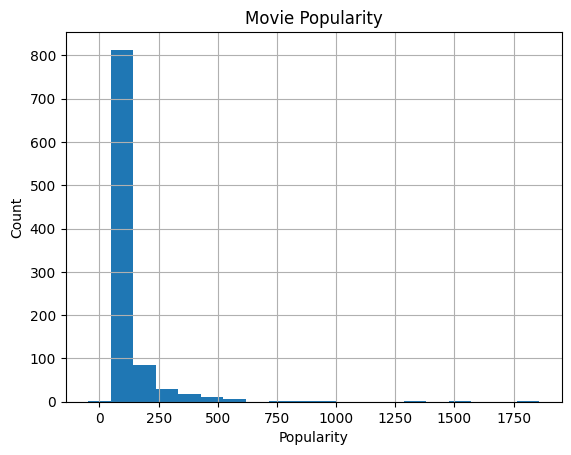

In [12]:
ax = %sqlplot histogram --table movie_genre_data --column popularity --bins 20
ax.grid()
ax.set_title("Movie Popularity")
ax.set_xlabel("Popularity")

Text(0.5, 0, 'Vote Score')

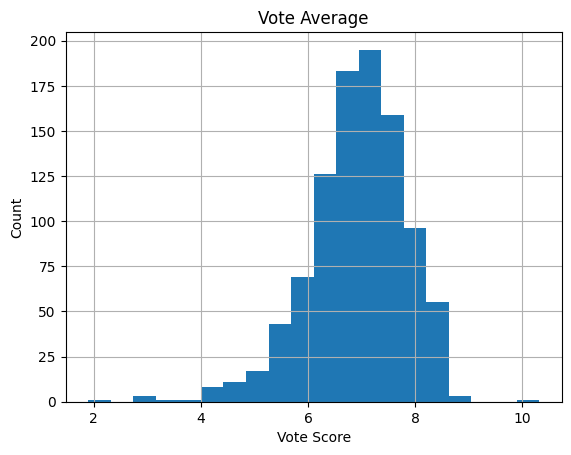

In [13]:
ax = %sqlplot histogram --table movie_genre_data --column vote_average --bins 20
ax.grid()
ax.set_title("Vote Average")
ax.set_xlabel("Vote Score")

Text(0.5, 0, 'Votes')

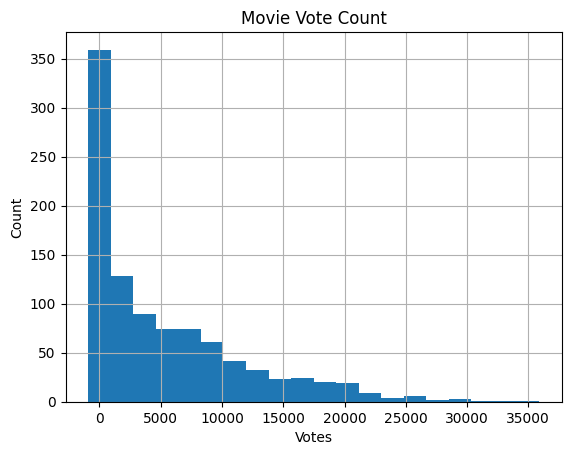

In [14]:
ax = %sqlplot histogram --table movie_genre_data --column vote_count --bins 20
ax.grid()
ax.set_title("Movie Vote Count")
ax.set_xlabel("Votes")

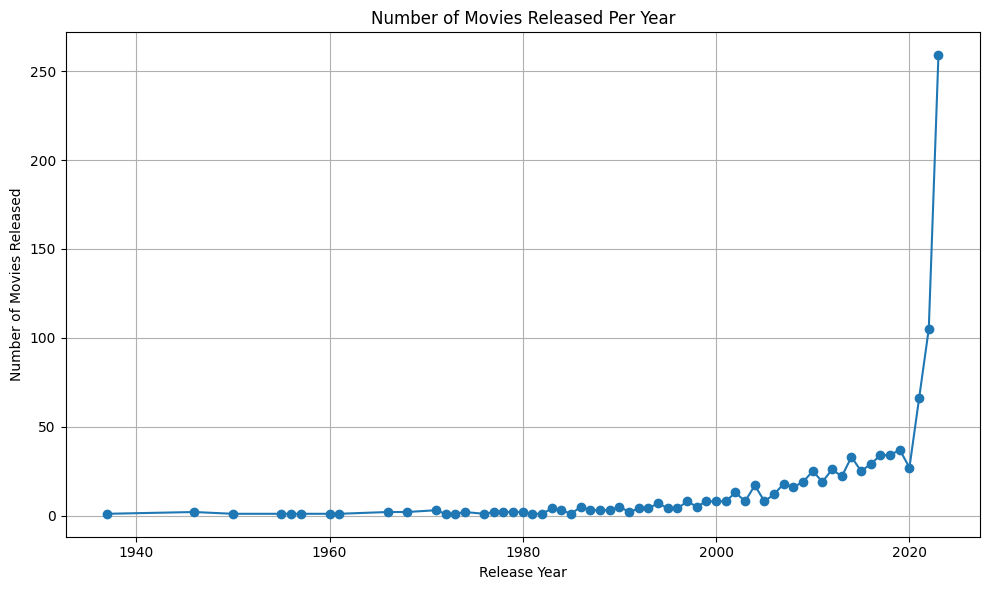

In [15]:
df["release_date"] = pd.to_datetime(df["release_date"])

df["release_year"] = df["release_date"].dt.year

movie_counts_by_year = df.groupby("release_year").size()

plt.figure(figsize=(10, 6))
plt.plot(movie_counts_by_year.index, movie_counts_by_year.values, marker="o")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies Released")
plt.title("Number of Movies Released Per Year")
plt.tight_layout()
plt.grid()
plt.show()

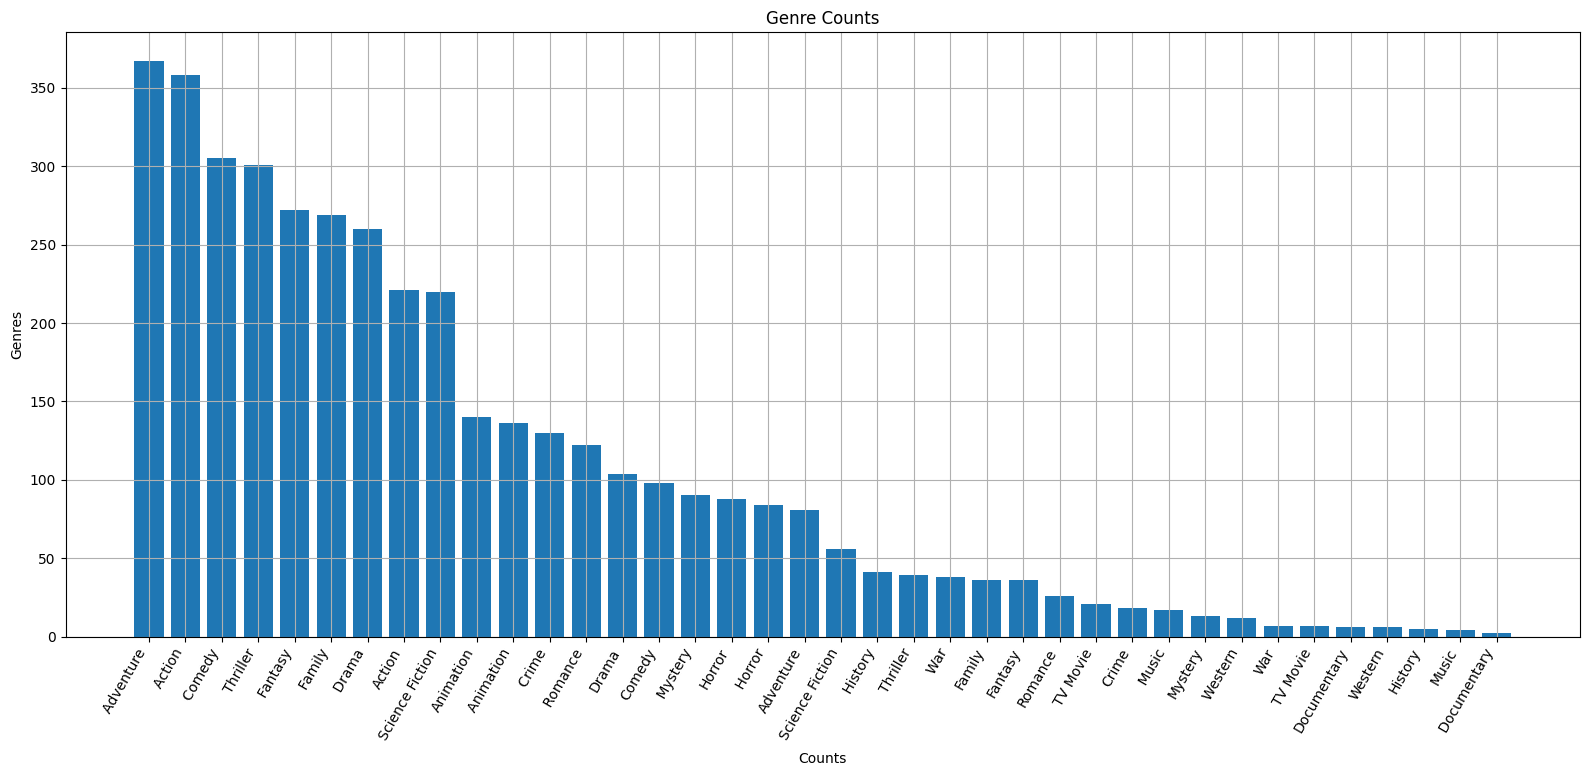

In [16]:
df["genre_names"] = df["genre_names"].astype(str)


def get_genre_count(df):
    genre_counts = dict()

    for genres in df["genre_names"]:
        genre_list = genres.split(",")
        for genre in genre_list:
            if genre not in genre_counts:
                genre_counts[genre] = 1
            genre_counts[genre] += 1
    return genre_counts


genre_counts = get_genre_count(df)

sorted_genre_counts = dict(
    sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)
)

genres = list(sorted_genre_counts.keys())
counts = list(sorted_genre_counts.values())

plt.figure(figsize=(16, 7))
plt.bar(genres, counts)
plt.ylabel("Genres")
plt.xlabel("Counts")
plt.title("Genre Counts")
plt.tight_layout()
plt.xticks(rotation=60, ha="right")
plt.grid()
plt.show()

# Moving forward

Now that preliminary data wrangling and EDA has been accomplished, the next step would be to implement a content based recommendation system. 

We'll experiment using cosine TF-IDF on our movie's description and genres.